# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [7]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]) # 17 X values
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]) #17 Y values
n_samples = train_X.shape[0]
#print(train_X.shape)
#print(train_Y.shape)
#print(n_samples)

## TensorFlow variable

* they are values which changes over the time 
* weights and biases are usually variables
* have to initialize when we declare them (mostly random)

## TensorFlow placeholder

* they are values which are initialized once and mostly never change over time
* input X, input Y are usually placeholder
* can be feed_dict when we run session using `sess.run()`

In [11]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

## Linear Model

$$ pred = X * W + b $$

In [12]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

$$cost = \frac{1}{2*n\_samples} \sum (pred - actual)^2$$

In [14]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.197805762 W= 0.443938 b= -0.59663
Epoch: 0100 cost= 0.183846101 W= 0.432379 b= -0.513479
Epoch: 0150 cost= 0.171498537 W= 0.421508 b= -0.435274
Epoch: 0200 cost= 0.160576895 W= 0.411283 b= -0.361719
Epoch: 0250 cost= 0.150916576 W= 0.401667 b= -0.292539
Epoch: 0300 cost= 0.142371893 W= 0.392622 b= -0.227473
Epoch: 0350 cost= 0.134814173 W= 0.384116 b= -0.166277
Epoch: 0400 cost= 0.128129393 W= 0.376115 b= -0.108721
Epoch: 0450 cost= 0.122216828 W= 0.36859 b= -0.054588
Epoch: 0500 cost= 0.116987243 W= 0.361513 b= -0.00367441
Epoch: 0550 cost= 0.112361819 W= 0.354857 b= 0.0442112
Epoch: 0600 cost= 0.108270794 W= 0.348596 b= 0.0892488
Epoch: 0650 cost= 0.104652435 W= 0.342708 b= 0.131608
Epoch: 0700 cost= 0.101452179 W= 0.33717 b= 0.171447
Epoch: 0750 cost= 0.098621726 W= 0.331962 b= 0.208917
Epoch: 0800 cost= 0.096118368 W= 0.327063 b= 0.244159
Epoch: 0850 cost= 0.093904316 W= 0.322455 b= 0.277305
Epoch: 0900 cost= 0.091946192 W= 0.318122 b= 0.30848
Epoch: 0950 cost= 

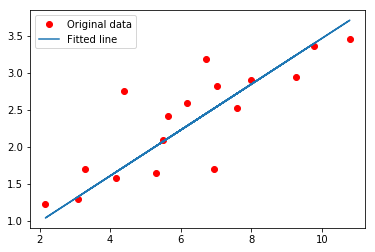

In [17]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

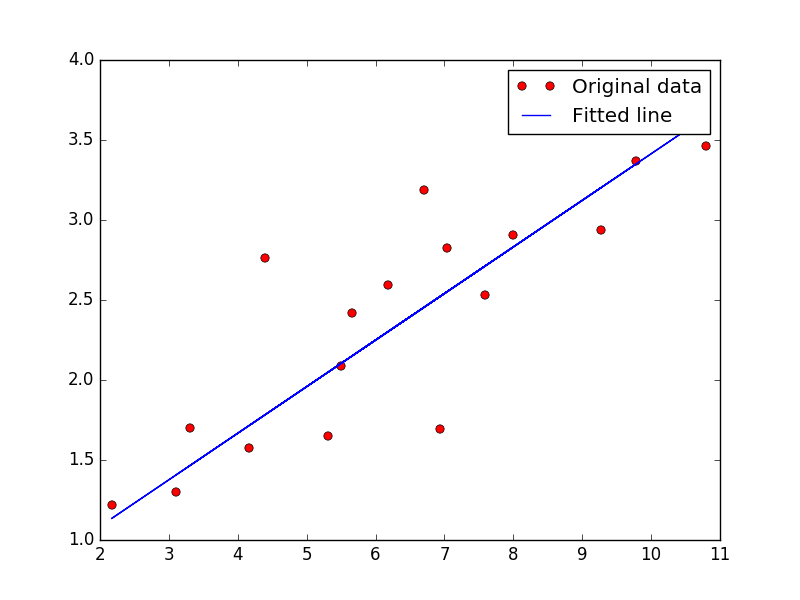

In [1]:
# Regression result